# 任务1 基于人脸识别算法实现人脸检测

## 职业能力目标

- 了解人脸识别在生活当中的应用场景；
- 掌握利用OpenCV实现图像的采集；
- 掌握调用算法接口，进行图像识别；
- 理解如何使用多线程的方式实现图像采集和人脸检测。

## 任务描述

本实验将实现用人脸检测算法库对USB摄像头实时采集并显示在JupyterLab的画面进行人脸检测并标注人脸框。

## 任务要求

- 使用ipywidgets定义图像盒子；
- 使用opencv的imencode方法将图像值转成byte类型的值；
- 使用IPython.display的display方法显示图像；
- 使用NLFaceDetect人脸检测算法库实例化人脸检测模型对象；
- 使用NL_FD_ComInit方法初始化模型；
- 使用NL_FD_InitVarIn方法读取图像数据；
- 使用NL_FD_Process_C方法检测人脸数量；
- 使用NL_FD_Exit方法释放算法内存；
- 使用多线程检测人脸。

## 任务实施

## 1. 人脸检测实验

### 1.1 人脸检测应用场景

  随着人脸识别技术的迅速发展，“刷脸”逐渐成为新时期生物识别技术应用的主要领域。尤其是在进入2017年之后，
  
  人脸识别更是迎来了井喷式的爆发，无论是在通关、金融、电信、公证等领域需要对人和证件进行一致性验证的场景，
  
  还是交通、公安、楼宇、社区等领域的安防布控场景，我们都可见人脸识别的身影。

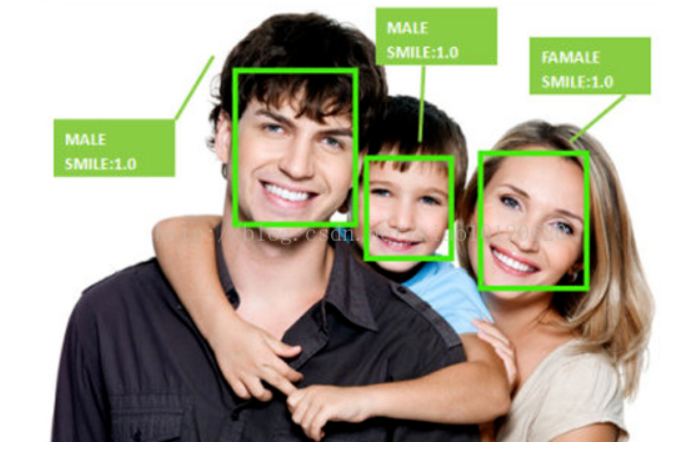

### 1.2 利用opencv采集图像


#### 1.2.1 引入相关的库

In [ ]:
import cv2
import time
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from lib.faceDetect import NLFaceDetect

#### 1.2.2 打开摄像头

使用`cv2.VideoCapture(camera_id)`方法来打开摄像头,赋值给`cap`

参数1`camera_id`指的是默认打开第一个接入的摄像头id，比如0；

如果存在两个摄像头，id就是可选，0或者1代表的就是不同的两个摄像头

执行如果没有报错，表示打开成功


In [ ]:
cap = cv2.VideoCapture(0)

#### 1.2.3 设置摄像头的分辨率宽高值

使用`cv2.set`方法来设置摄像头分辨率

参数`camera_width`是摄像头分辨率宽度，`camera_height`是摄像头分辨率的高度，可以根据自己的需求修改，比如`640*480`

In [ ]:
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

#### 1.2.4 从摄像头获取一帧图片
返回值`ret`为状态布尔值，是否获取到图片，`True`表示获取成功，反之失败，`image`为图片数据，如果需要显示视频流，则需要循环读取图片

`ret, image = cap.read()`


In [ ]:
ret, image = cap.read()
print(ret)

#### 1.2.5 显示获取的图片

利用jupyter的画图库和显示库，来显示获取的图片

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像按照jpg格式编码

cap.release() # 释放摄像头

### <font color=red size=3>动手练习1</font>

第一步：获取图像

- 在`<1>`处设置摄像头拍摄图片尺寸为`640*480`

- 在`<2>`处拍摄自己的头部照片，返回值赋给`ret`和`image`.

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

cap = cv2.VideoCapture(0)
#第一步
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
time.sleep(2)
#捕捉的图片命名为image
ret, image = cap.read()
print(ret)

第二步：显示图像

在`<3>`处补充代码，利用`cv2.imencode`函数与`tobytes()`函数将图片`image`显示出来

**若打印出来的图像中，没有人脸,请重新采集**

In [ ]:
#第二步
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() 

cap.release() # 释放摄像头

- 第三步:保存图片

在`<4>`处使用`cv2.imwrite()`方法将`image`图片存下并命名为`myself.jpg`

In [ ]:
# 第三步
cv2.imwrite("myself.jpg",image)

**填写完成后查看当前路径下是否存在`myself.jpg`图片，若存在说明填写正确。**

<details>
<summary><font color=red size=3>点击查看动手练习1答案</font></summary>
<pre><code>

```python
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

cap = cv2.VideoCapture(0)
#第一步
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
time.sleep(2)
#捕捉的图片命名为image
ret, image = cap.read()
print(ret)


#第二步
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

cap.release() # 释放摄像头


# 第三步
cv2.imwrite("myself.jpg",image)

```

</code></pre>
</details>

### 1.3 调用人脸识别算法接口

算法接口的调用，不但要进行识别检测，还要把结果显示在图片上，比如说把人脸框画在图片上，等等；

#### 1.3.1 导入人脸识别算法接口库

该人脸算法库是底层由C写的算法库，集成在核心开发板上，在经过python的对接后，形成了一套python的接口库，可以直接调用

In [ ]:
from lib.faceDetect import NLFaceDetect  
import cv2

#### 1.3.2 实例化算法接口对象

`
nlFaceDetect = NLFaceDetect(libNamePath)
`

加载库，以及指定函数参数类型和返回值类型，并初始化结构体变量，`libNamePath`是固定库文件路径，执行没有报错，表示实例化成功


In [ ]:
libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定库文件路径
nlFaceDetect = NLFaceDetect(libNamePath)  # 实例化算法类

#### 1.3.3 加载模型和配置，并初始化


`
nlFaceDetect.NL_FD_ComInit(configPath) 
`

将内存分配到各个模块，比如，人脸检测，人脸对齐等等， `configPath`是模型和配置文件路径，执行没有报错，表示加载成功

In [ ]:
configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
nlFaceDetect.NL_FD_ComInit(configPath)  # 加载模型并初始化

#### 1.3.4 加载图片数据


`
nlFaceDetect.NL_FD_InitVarIn(image)
`

将采集到的图片数据，加载到算法中(`limg`为图片数据)，返回0表示加载成功

In [ ]:
image = cv2.imread("./exp/boy.jpg")
ret1 = nlFaceDetect.NL_FD_InitVarIn(image)
print(ret1)

#### 1.3.5 打印原始的照片

In [ ]:
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

#### 1.3.6 调用人脸检测主函数处理图像

`nlFaceDetect.NL_FD_Process_C()`可以识别图片中的人脸,并且返回人脸个数


In [ ]:
face_num = nlFaceDetect.NL_FD_Process_C()  # 返回值是目标个数
print('人脸个数：', face_num)

#### 1.3.7 取出人脸个数值

`nlFaceDetect.NL_FD_Process_C()`获取的人脸个数数值会保存到`nlFaceDetect.djEDVarOut.num`中

从人脸检测输出结构体里面，获取人脸个数


In [ ]:
face_num = nlFaceDetect.djEDVarOut.num
print('人脸个数：', face_num)

#### 1.3.8 根据人脸个数，循环取出人脸框位置信息，画在图片上，并打印出结果

####  取出人脸框位置信息

`(x1,y1)`代表左上角坐标，`（x2,y2）`代表右下角的坐标

`
outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
(outObject.x1, outObject.y1, outObject.x2, outObject.y2)
`

#### 利用opencv在图像上添加文字和画出人脸框

`cv2.putText()`的作用是在图片的某个位置上添加文字信息
参数依次为：图片，要添加的文字，文字添加到图片上的位置，字体的类型，字体大小，字体颜色，字体粗细

`
cv2.putText(limg, str('Face'), (int(outObject.x1), int(outObject.y1)), font, 0.8, (255, 0, 0), 2)
`

`cv2.rectangle()`的作用是根据坐标，描绘一个简单的矩形边框参数依次为：图片，左上角右下角位置坐标，线条颜色，线条粗细

`
cv2.rectangle(limg, (int(outObject.x1), int(outObject.y1)),(int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)
`

In [ ]:
for i in range(face_num):
    outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
    print("Total face:", face_num, " ID: ", i)  # 打印人脸个数
    print('face box :%0.2f,%0.2f,%0.2f,%0.2f' % (outObject.x1, outObject.y1, 
                                                 outObject.x2, outObject.y2))  # 打印人脸框的位置信息
    print('Scores: %f' % outObject.score)   # 打印识别置信度

    font = cv2.FONT_HERSHEY_SIMPLEX  # 定义字体
    cv2.putText(image, str('Face'), (int(outObject.x1), int(outObject.y1)), font, 0.8,
                        (255, 0, 0), 2)  # 在图片上描绘文字
    cv2.rectangle(image, (int(outObject.x1), int(outObject.y1)),
                  (int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)  # 在图片上画出人脸框

#### 1.3.9 显示算法处理的图像

利用jupyter的画图库和显示库，来显示获取的图片，并释放内存和模型

In [ ]:
imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

nlFaceDetect.NL_FD_Exit() # 释放算法内存和模型

 ### <font color=red size=3>动手练习2</font>
 
 
使用刚才保存的自己的图片进行人脸检测的实验

- 在`<1>`处将文件路径赋值给`libNamePath`

- 在`<2>`处使用`NLFaceDetect()`方法实例化算法类

- 在`<3>`处指定模型以及配置文件路径，路径为`/usr/local/lib/rk3399_AI_model`

- 在`<4>`处使用`nlFaceDetect.NL_FD_ComInit()`方法加载模型

- 在`<5>`处加载`./exp/myself.jpg`图片并赋值给`image`，使用`nlFaceDetect.NL_FD_InitVarIn()`将图片加载到算法中

- 在`<6>`处使用`nlFaceDetect.NL_FD_Process_C()`写入测定目标个数，赋值给`ret3`

- 在`<7>`处利用`nlFaceDetect.djEDVarOut.num`读取人脸数量,并赋值给`face_num`


In [ ]:
from lib.faceDetect import NLFaceDetect  
#第一步
libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定库文件路径
#第二步
nlFaceDetect = NLFaceDetect(libNamePath)  # 实例化算法类
#第三步
configPath = b"/usr/local/lib/rk3399_AI_model" # 指定模型以及配置文件路径
#第四步
nlFaceDetect.NL_FD_ComInit(configPath)  # 加载模型并初始化
#第五步
image = cv2.imread('./myself.jpg')
ret1 = nlFaceDetect.NL_FD_InitVarIn(image)
print(ret1)
#第六步
ret3 = nlFaceDetect.NL_FD_Process_C()  # 返回值是目标个数
print('人脸个数：', ret3)
#第七步
face_num = nlFaceDetect.djEDVarOut.num
print('人脸个数：', face_num)

**完成实验后执行以下代码在图片中绘制人脸框,并打印出图片，若不能成功打印则实验失败，请再次尝试实验**

In [ ]:
for i in range(face_num):
    outObject = nlFaceDetect.djEDVarOut.faceInfos[i].bbox
    print("Total face:", face_num, " ID: ", i)  # 打印人脸个数
    print('face box :%0.2f,%0.2f,%0.2f,%0.2f' % (outObject.x1, outObject.y1, 
                                                 outObject.x2, outObject.y2))  # 打印人脸框的位置信息
    print('Scores: %f' % outObject.score)   # 打印识别置信度

    font = cv2.FONT_HERSHEY_SIMPLEX  # 定义字体
    imgzi = cv2.putText(image, str('Face'), (int(outObject.x1), int(outObject.y1)), font, 0.8,
                        (255, 0, 0), 2)  # 在图片上描绘文字
    cv2.rectangle(image,(int(outObject.x1), int(outObject.y1)),
                  (int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)  # 在图片上画出人脸框
    
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库

imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
display(imgbox)  # 将盒子显示出来
imgbox.value = cv2.imencode('.jpg', image)[1].tobytes() # 把图像值转成byte类型的值

nlFaceDetect.NL_FD_Exit() # 释放算法内存和模型

<details>
<summary><font color=red size=3>点击查看动手练习2答案</font></summary>
<pre><code>

```python
from lib.faceDetect import NLFaceDetect  
#第一步
libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定库文件路径
#第二步
nlFaceDetect = NLFaceDetect(libNamePath)  # 实例化算法类
#第三步
configPath = b"/usr/local/lib/rk3399_AI_model" # 指定模型以及配置文件路径
#第四步
nlFaceDetect.NL_FD_ComInit(configPath)  # 加载模型并初始化
#第五步
image = cv2.imread('./myself.jpg')
ret1 = nlFaceDetect.NL_FD_InitVarIn(image)
print(ret1)
#第六步
ret3 = nlFaceDetect.NL_FD_Process_C()  # 返回值是目标个数
print('人脸个数：', ret3)
#第七步
face_num = nlFaceDetect.djEDVarOut.num
print('人脸个数：', face_num)
```
</code></pre>
</details>

### 1.4 利用多线程方式实现视频流的人脸检测

利用多线程，使图像采集和算法识别同时运行，从而实现视频流的人脸检测，并且可以避免一些因花时间太久，导致的视频卡顿

#### 1.4.1 引入相关的库

#### threading线程库

多线程类似于同时执行多个不同程序，多线程运行有如下优点：

- 使用线程可以把占据长时间的程序中的任务放到后台去处理。
- 用户界面可以更加吸引人，比如用户点击了一个按钮去触发某些事件的处理，可以弹出一个进度条来显示处理的进度。
- 程序的运行速度可能加快。
- 在一些等待的任务实现上如用户输入、文件读写和网络收发数据等，线程就比较有用了。在这种情况下我们可以释放一些珍贵的资源如内存占用等等。

每个独立的线程有一个程序运行的入口、顺序执行序列和程序的出口。

但是线程不能够独立执行，必须依存在应用程序中，由应用程序提供多个线程执行控制。

In [ ]:
import time   # 时间库
import cv2      # 引入opencv图像处理库
import threading   # 这是python的标准库，线程库
import ipywidgets as widgets    # jupyter画图库
from IPython.display import display  # jupyter显示库
from lib.faceDetect import NLFaceDetect  # 人脸识别算法库接口

#### 1.4.2 定义摄像头采集线程

结合上面的`opencv`采集图像的内容，利用多线程的方式串起来，形成一个可传参，可调用的通用类。

这里定义了一个全局变量`camera_img`，用作存储获取的图片数据，以便于其他线程可以调用

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，打开摄像头，并设置分辨率

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。在该函数里，实现了循环获取图像的内容

In [ ]:
class CameraThread(threading.Thread):
    def __init__(self, camera_id, camera_width, camera_height):
        threading.Thread.__init__(self)
        self.working = True
        self.cap = cv2.VideoCapture(camera_id)  # 打开摄像头
        self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, camera_width)  # 设置摄像头分辨率宽度
        self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, camera_height)  # 设置摄像头分辨率高度
        
    def run(self):
        global camera_img     # 定义一个全局变量，用于存储获取的图片，以便于算法可以直接调用
        camera_img = None
        while self.working:
            ret, image = self.cap.read()  # 获取新的一帧图片
            if ret:
                camera_img = image
            
    def stop(self):
        self.working = False
        self.cap.release()

#### 1.4.3 定义算法识别线程

结合调用算法接口的内容和图像显示内容，利用多线程的方式整合起来，循环识别，

对摄像头采集线程中获取的每一帧图片进行识别，并显示，形成视频流的画面

- `init`初始化函数

实例化该线程的时候，会自动执行初始化函数，在初始化函数里面，定义了显示内容，并实例化算法和加载模型

- `run`函数

该函数是在实例化后，执行`start`启动函数的时候，会自动执行。

在该函数是一个循环，实现了对采集的每一帧图片进行算法识别，然后将结果绘画在图片上，并将处理后的图片显示出来

In [ ]:
class FaceDetectThread(threading.Thread):
    def __init__(self):
        threading.Thread.__init__(self)
        self.working = True
        self.running = False
        self.imgbox = widgets.Image()  # 定义一个图像盒子，用于装载图像数据
        display(self.imgbox)  # 将盒子显示出来
        configPath = b"/usr/local/lib/rk3399_AI_model"  # 指定模型以及配置文件路径
        libNamePath = '/usr/local/lib/libNL_faceEnc.so'  # 指定库文件路径
        self.nlFaceDetect = NLFaceDetect(libNamePath)  # 实例化算法类
        ret = self.nlFaceDetect.NL_FD_ComInit(configPath)  # 初始化         
    def run(self):
        self.running = True
        while self.working:
            try:
                if camera_img is not None:
                    limg = camera_img   # 获取全局变量图像值
                    if self.nlFaceDetect.NL_FD_InitVarIn(limg) == 0: # 将图片作为输入，传入到算法中
                        if self.nlFaceDetect.NL_FD_Process_C() > 0: # 返回值是目标个数
                            # 人脸检测结果输出
                            for i in range(self.nlFaceDetect.djEDVarOut.num):
                                outObject = self.nlFaceDetect.djEDVarOut.faceInfos[i].bbox
                                font = cv2.FONT_HERSHEY_SIMPLEX  # 定义字体
                                imgzi = cv2.putText(limg, str('Face'), (int(outObject.x1), int(outObject.y1)), font, 0.8,
                                                    (255, 0, 0), 2)  # 在图片上描绘文字
                                cv2.rectangle(limg, (int(outObject.x1), int(outObject.y1)),
                                              (int(outObject.x2), int(outObject.y2)), (0, 0, 255), 2)  # 在图片上画出人脸框
                    self.imgbox.value = cv2.imencode('.jpg', limg)[1].tobytes() # 把图像值转成byte类型的值
            except Exception as e:
                pass          
        self.running = False
    def stop(self):
        self.working = False
        while self.running:
            pass
        self.nlFaceDetect.NL_FD_Exit()

#### 1.4.4 调用两个线程，启动视频流的人脸检测

实例化两个线程，并启动这两个线程，实现完整的人脸检测功能，运行时，加载模型比较久，需要等待几秒

In [ ]:
camera_th = CameraThread(0, 640, 480)
face_detect_th = FaceDetectThread()

camera_th.start()
face_detect_th.start()

#### 1.4.5 停止线程

为了避免占用资源，结束实验时需要停止摄像头采集线程和算法识别线程，或者重启内核

In [ ]:
face_detect_th.stop()
camera_th.stop()

## 任务小结

本次实验的收获：

- 了解了人脸识别在生活当中的应用场景；
- 学会了使用多线程的方式，并调用算法接口实现人脸实时检测。